# 이미지 확인하기

In [33]:
# 라이브러리
import os
import cv2
import pandas as pd
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"]=10, 10

In [34]:
# data path 설정
DATA_PATH = '../data/'
data_list = os.listdir(DATA_PATH)

len(data_list)

4646

In [35]:
# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    if data == 'img' or data == 'train_annotation.txt':
        pass
    else:
        data = DATA_PATH + data
        if data.endswith('txt'):
            txt_list.append(data)
        else:
            img_list.append(data)

txt_list.sort()
img_list.sort()

print(len(img_list), len(txt_list))

2322 2322


### 확인하기

In [36]:
print(img_list[0], '|', txt_list[0])

../data/5820554de4b0ced31a7fd174.jpg | ../data/5820554de4b0ced31a7fd174.txt


In [37]:
# 라벨
df = pd.read_csv(txt_list[0])
df

,class,center_x,center_y,w,h,angle
0,1,530,1880,900,900,0
1,2,2430,1860,900,900,0
2,3,690,4960,900,900,0
3,4,2330,4960,900,900,0
4,5,1210,7270,540,540,0
5,6,1830,7270,560,560,0


In [38]:
# cv2로 이미지 읽기
img = cv2.imread(img_list[0])
print(img.shape)

cv2.imshow('img', img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(7581, 3019, 3)


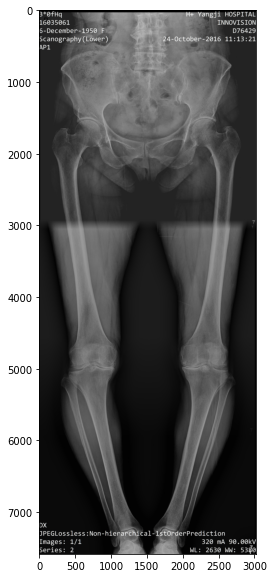

In [39]:
# plt로 이미지 읽기
plt.imshow(img)

## 이미지 resize 하기

In [40]:
resized_img = cv2.resize(img, dsize=(1024, 1024), interpolation=cv2.INTER_LINEAR)

(1024, 1024, 3)


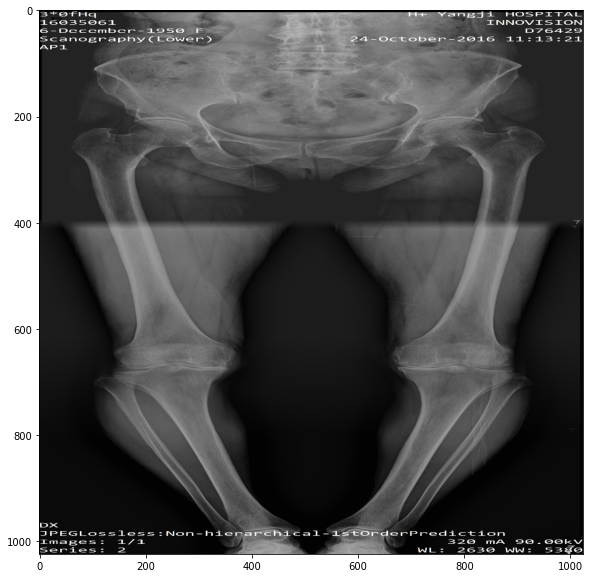

In [41]:
print(resized_img.shape)

plt.imshow(resized_img)
plt.show()

- 그냥 지정된 사이즈로 resize하면 이상한 모양이 나온다.
- 사람의 하지이므로 세로가 길고 가로가 짧아야 하므로 정사각형 x, 직사각형 모양이어야 함

### 비율로 이미지 사이즈 줄이기

- 비율로 조정하면 더 이쁘게 resize 되지 않을까..?

(531, 211, 3)


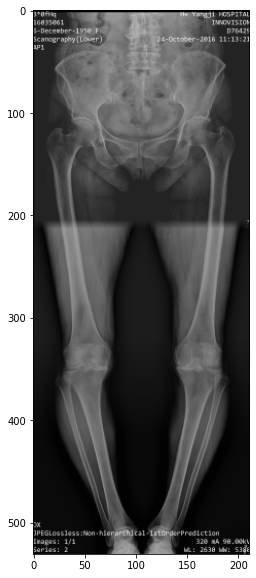

In [42]:
resized_img = cv2.resize(img, dsize=(0, 0), fx=0.07, fy=0.07, interpolation=cv2.INTER_AREA)

print(resized_img.shape)

plt.imshow(resized_img)
plt.show()

In [25]:
# 좌표 변경 함수
def cvt_coordinate(center_x, center_y, w, h, ratio=1):
    start_x, end_x = center_x - (w//2), center_x + (w//2)
    start_y, end_y = center_y - (h//2), center_y + (h//2)
    
    start_x *= ratio
    start_y *= ratio 
    end_x *= ratio
    end_y *= ratio
    
    return int(start_x), int(start_y), int(end_x), int(end_y)

In [26]:
cvt_coordinate(530, 1880, 900, 900)

(80, 1430, 980, 2330)

### Bounding box 하나 test 해보기

(2274, 906, 3)


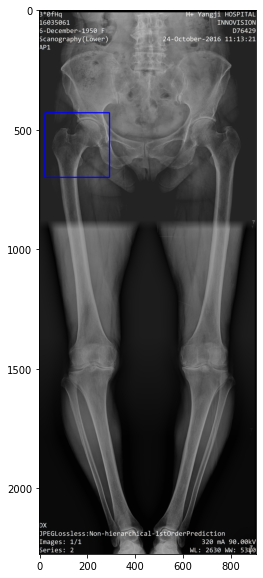

In [27]:
ratio=0.3
sx, sy, ex, ey = cvt_coordinate(530, 1880, 900, 900, ratio)

resized_img = cv2.resize(img, dsize=(0, 0), fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)
resized_img = cv2.rectangle(resized_img, (sx, sy), (ex, ey), (0, 0, 255), 3)

print(resized_img.shape)
plt.imshow(resized_img)
plt.show()

## 정리

In [28]:
def ratio_multiply(num, ratio=1):
    return int(num*ratio)

In [29]:
# bounding box 좌표 변경하기
def cvt_coordinate(center_x, center_y, w, h, ratio=1):
    '''
    start_x, start_y: 시작 꼭짓점 좌표 (x, y)
    end_x, end_y: 종료 꼭짓점 좌표 (x, y)
    ratio: resize 비율
    '''
    start_x, end_x = center_x - (w//2), center_x + (w//2)
    start_y, end_y = center_y - (h//2), center_y + (h//2)
    
    start_x = ratio_multiply(start_x, ratio)
    start_y = ratio_multiply(start_y, ratio) 
    end_x = ratio_multiply(end_x, ratio)
    end_y = ratio_multiply(end_y, ratio)
    
    return start_x, start_y, end_x, end_y

In [30]:
idx = 100

shape: (686, 302, 3)


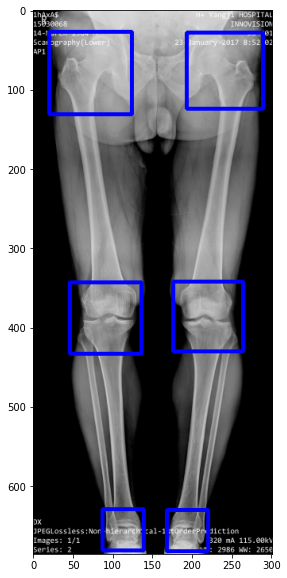

In [31]:
img = cv2.imread(img_list[idx])
df = pd.read_csv(txt_list[idx])
ratio = 0.1

resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

# bounding box
for i in range(6):
    sr = df.iloc[i]
    center_x, center_y, w, h = sr[1], sr[2], sr[3], sr[4]
    start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
#     print(start_x, start_y, end_x, end_y)
    resized_img = cv2.rectangle(resized_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 3)

print("shape:", resized_img.shape)
    
plt.imshow(resized_img)
plt.show()

In [32]:
def make_image(idx):
    img = cv2.imread(img_list[idx])
    df = pd.read_csv(txt_list[idx])
    ratio = 1

    resized_img = cv2.resize(img, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_AREA)

    # bounding box
    for i in range(6):
        sr = df.iloc[i]
        center_x, center_y, w, h = sr[1], sr[2], sr[3], sr[4]
        start_x, start_y, end_x, end_y = cvt_coordinate(center_x, center_y, w, h, ratio)
    #     print(start_x, start_y, end_x, end_y)
        resized_img = cv2.rectangle(resized_img, (start_x, start_y), (end_x, end_y), (0, 0, 255), 3)

    print("shape:", resized_img.shape)

    plt.imshow(resized_img)
    plt.show()

# 이미지들 shape 확인해보기

In [206]:
# data path 설정
DATA_PATH = '../data/'
data_list = os.listdir(DATA_PATH)

print("len total data: ", len(data_list))

# 이미지와 라벨 데이터 
img_list = []
txt_list = []

for data in data_list:
    data = DATA_PATH + data
    if data.endswith('txt'):
        txt_list.append(data)
    else:
        img_list.append(data)

txt_list.sort()
img_list.sort()

print(f"len img: {len(img_list)}, len txt: {len(txt_list)}" )

4644
2322 2322


In [215]:
from tqdm import tqdm

In [216]:
w_lst, h_lst = [], []
n = len(img_list)
for i in tqdm(range(n)):
    h, w, _ = cv2.imread(img_list[i]).shape
    w_lst.append(w)
    h_lst.append(h)

mean_w = sum(w_lst) / n
mean_h = sum(h_lst) / n

print(mean_w, mean_h)

100%|██████████| 2322/2322 [13:18<00:00,  2.92it/s]


3001.244616709733 7397.793281653747


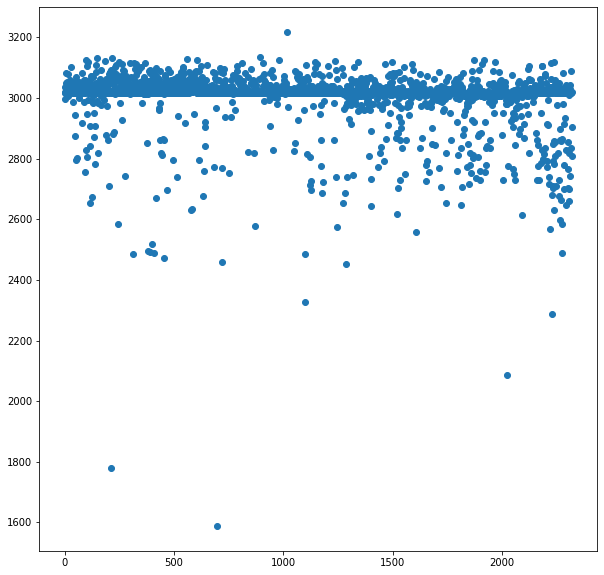

In [224]:
plt.plot(list(range(n)), w_lst, 'o')

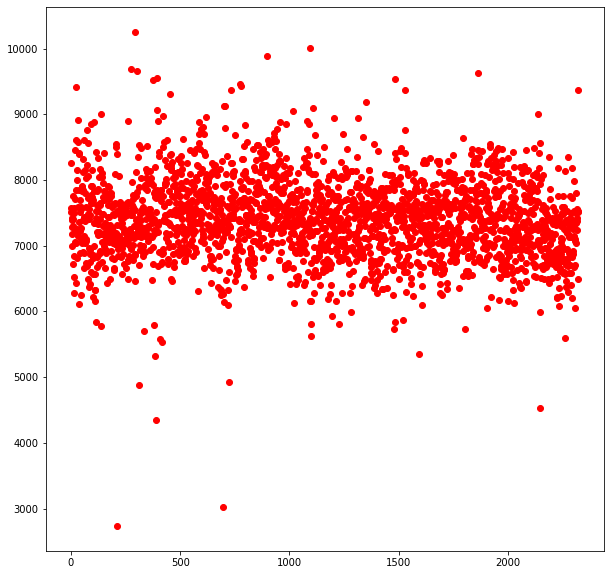

In [236]:
plt.plot(list(range(n)), h_lst, 'or')

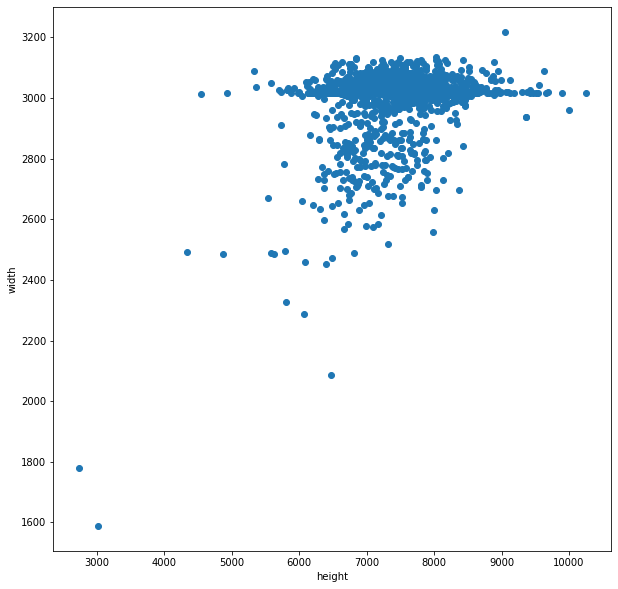

In [243]:
plt.plot(h_lst, w_lst, 'o')
plt.xlabel('height')
plt.ylabel('width')
plt.show()

In [246]:
min(w_lst), min(h_lst)

(1588, 2734)

shape: (3017, 1588, 3)


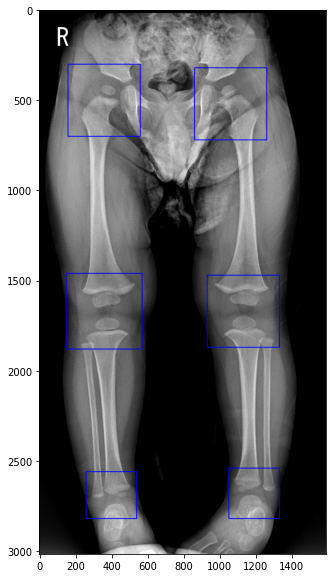

In [231]:
idx = w_lst.index(min(w_lst))
print(idx)

make_image(idx)

2734
211
shape: (2734, 1780, 3)


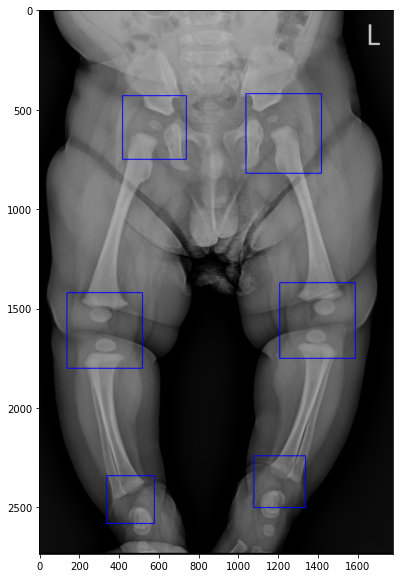

In [245]:
idx = h_lst.index(min(h_lst))
print(min(h_lst))
print(idx)

make_image(idx)